In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.fft import rfft
from scipy import signal

In [23]:
df = pd.read_csv('RUN2.csv')
tabela1 = df.set_index('f1')
tabela2 = df.set_index('f2')
f1=tabela1.index.values
f2=tabela2.index.values
df

,fxosaccx,fxosaccy,fxosaccz,lsmaccx,lsmaccy,lsmaccz,lsmangx,lsmangy,lsmangz,a0,a1,a2,a3,a4,a5,f1,f2,timestamp
0,23957,19476,-31928,0,0,0,0,0,0,0,1,8192,5,0,0,0,0,0
1,10,0,0,-32440,19732,-32040,0,0,8192,0,0,0,0,0,33336,19380,33288,536870912
2,0,0,-32280,15,0,0,0,0,0,19108,33224,0,0,8192,20,0,0,0
3,0,8192,25,0,0,-32312,18884,-32456,0,0,0,0,0,0,0,0,33240,33128
4,0,0,0,0,8192,30,0,0,0,0,36408,16916,32759,0,1,8192,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,0,8192,29310,0,0,-31816,16468,32583,1,0,0,0,0,0,0,0,33784,32567
3679,0,0,0,1,8192,29315,0,0,0,0,33624,16355,32551,1,0,8192,29320,0
3680,32615,0,0,0,0,0,0,-31720,16420,8192,29325,0,0,0,0,0,0,1075086152
3681,0,0,0,32551,1,1,8192,29330,0,0,0,0,33832,16516,32583,0,0,29335


In [24]:
#depende do tamanho do arquivo esse números ainda tenho que automatizar. Então basicamente tu tem que mudar eles.

vel_bruto =[]
rot_bruto = []
rel=[]
cont = 0
for i in range(int(len(f1)/10)):
    rot_bruto.append(sum(f1[i*10:i*10+10]))
    vel_bruto.append(sum(f2[i*10:i*10+10]))

rot = [j * 20 * 60 for j in rot_bruto]
vel = [i * 0.584 * 3.1415 * 20 * 3.6 / 15 for i in vel_bruto]

print(rot)
print(vel)


# 15 furos

[52809600, 39595200, 49005600, 39229200, 29437200, 49005600, 39576000, 48928800, 39210000, 48986400, 39190800, 29379600, 49005600, 39248400, 49314000, 39229200, 49044000, 39267600, 29379600, 48949200, 39171600, 49832400, 39499200, 49083600, 39190800, 29360400, 49005600, 39229200, 48928800, 39114000, 48928800, 39210000, 29379600, 48967200, 39248400, 49160400, 39152400, 48756000, 39229200, 29322000, 48948000, 39210000, 48852000, 39825600, 48968400, 39248400, 29322000, 48909600, 39248400, 48948000, 39210000, 49275600, 39480000, 29398800, 48890400, 39210000, 48986400, 39286800, 49333200, 39210000, 29418000, 48967200, 39190800, 49141200, 39210000, 48986400, 39133200, 29283600, 48986400, 39267600, 48928800, 39248400, 49006800, 39286800, 29456400, 49122000, 39364800, 49200000, 39422400, 49160400, 39327600, 29611200, 49353600, 39616800, 49006800, 39326400, 49220400, 39460800, 29803200, 49544400, 39422400, 49024800, 39267600, 49238400, 39152400, 29497200, 49526400, 39366000, 49201200, 39249600,

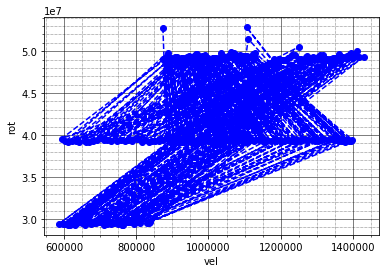

In [25]:
plt.plot(vel, rot, marker='o', linestyle='--', color='b') 
plt.xlabel('vel')
plt.ylabel('rot')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

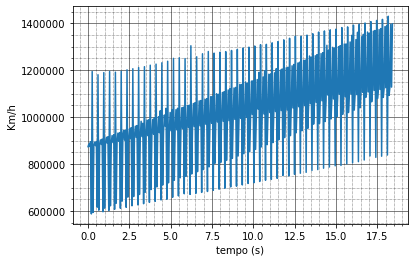

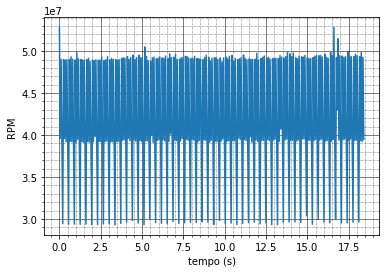

In [26]:
t = np.linspace(0, 0.05*len(f1)/10, len(f1)/10)

plt.plot(t,vel)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('Km/h')
plt.show()


plt.plot(t,rot)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('RPM')
plt.show()

In [27]:
data = { 
'RPM': rot,
'vel': vel}

In [28]:
csv = pd.DataFrame(data, columns=['RPM','vel'])

In [29]:
csv.to_csv('AV1_data.csv')

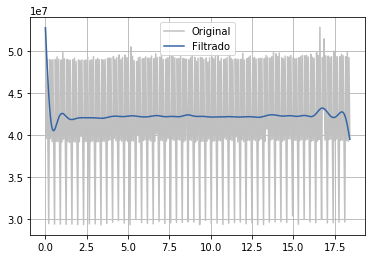

In [30]:
b, a = signal.butter(4, 0.10, analog=False)

# Show that frequency response is the same
impulse = np.zeros(1000)
impulse[500] = 1

# Applies filter forward and backward in time
imp_ff = signal.filtfilt(b, a, impulse)

# Applies filter forward in time twice (for same frequency response)
imp_lf = signal.lfilter(b, a, signal.lfilter(b, a, impulse))


sig_rot = signal.filtfilt(b, a, rot)
plt.plot(t, rot, color='silver', label='Original')
plt.plot(t, sig_rot, color='#3465a4', label='Filtrado')
plt.grid(True, which='both')
plt.legend(loc="best")

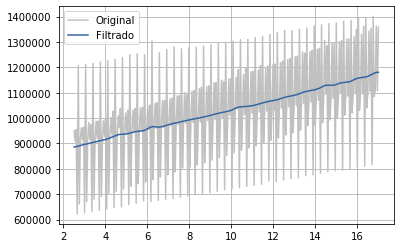

In [31]:
c, d = signal.butter(4, 0.15, analog=False)

# Show that frequency response is the same
impulse = np.zeros(1000)
impulse[500] = 1

# Applies filter forward and backward in time
imp_ff = signal.filtfilt(c, d, impulse)

# Applies filter forward in time twice (for same frequency response)
imp_lf = signal.lfilter(c, d, signal.lfilter(c, d, impulse))


sig_vel = signal.filtfilt(c, d, vel)
plt.plot(t[50:340], vel[50:340], color='silver', label='Original')
plt.plot(t[50:340], sig_vel[50:340], color='#3465a4', label='Filtrado')
plt.grid(True, which='both')
plt.legend(loc="best")

In [32]:
sig_rot

array([52782570.96257266, 50577360.54679686, 48456971.01027476,
       46503251.95230976, 44783115.42527364, 43343445.83832321,
       42208809.59909154, 41381897.73267511, 40846138.94789142,
       40569677.4409482 , 40509944.68745288, 40618264.98864628,
       40844178.86537503, 41139314.24393817, 41460628.56962252,
       41772779.21719439, 42049407.82055254, 42273294.17863527,
       42435571.98468759, 42534385.6787665 , 42573397.08319522,
       42560391.90163236, 42506006.5847356 , 42422470.48388433,
       42322302.44219995, 42217047.85929826, 42116272.60932317,
       42027029.27350659, 41953845.58811726, 41899069.13765252,
       41863302.64326225, 41845734.71727454, 41844339.97110856,
       41856076.33905728, 41877237.60553317, 41903989.8271207 ,
       41932939.08223634, 41961506.78208908, 41987980.36147846,
       42011288.24803351, 42030702.92022256, 42045696.40725847,
       42056026.90938349, 42061934.29091873, 42064230.50043592,
       42064145.68610602, 42062964.67784

In [33]:
sig_vel

array([ 873188.3867277 ,  864711.10048529,  856981.19723937,
        850611.64498861,  846025.30846748,  843379.69541337,
        842549.14731338,  843171.3411552 ,  844743.97880639,
        846746.14224184,  848747.39418113,  850468.07972995,
        851781.57556743,  852679.55839922,  853228.09251463,
        853534.54695395,  853732.52389498,  853971.78945374,
        854392.2256408 ,  855082.43387342,  856047.69941715,
        857209.16392734,  858438.19177998,  859612.65061587,
        860665.001076  ,  861591.94660649,  862425.04411828,
        863191.56153188,  863894.61269796,  864523.50010447,
        865086.26091265,  865637.68638155,  866274.17067361,
        867095.01431596,  868158.99535056,  869464.26287878,
        870960.59528019,  872583.72873111,  874284.36846957,
        876025.82985306,  877754.982644  ,  879379.59228224,
        880779.33222527,  881851.14164813,  882565.51728984,
        882996.22092717,  883296.22320424,  883631.44133627,
        884115.00437597,

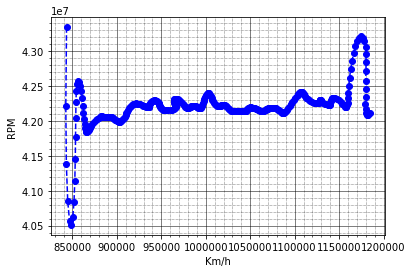

In [34]:
plt.plot(sig_vel[5:350], sig_rot[5:350], marker='o', linestyle='--', color='b') 
plt.xlabel('Km/h')
plt.ylabel('RPM')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('Vel x Rot.jpeg')
plt.show()

In [35]:
data = { 
'RPM': sig_rot,
'vel': sig_vel}
csv = pd.DataFrame(data, columns=['RPM','vel'])
csv.to_csv('AV1_filt.csv')

In [36]:
tabela3 = df.set_index('fxosaccx')
tabela4 = df.set_index('fxosaccy')
tabela5 = df.set_index('fxosaccz')

accx=tabela3.index.values *0.00036
accy=tabela4.index.values *0.00036
accz=tabela5.index.values *0.00036

t1 = np.linspace(0, 0.005*len(f1), len(f1))


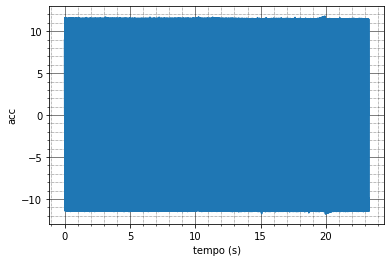

In [18]:
plt.plot(t1,accx)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

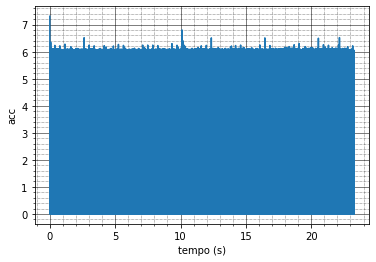

In [19]:
plt.plot(t1,accy)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

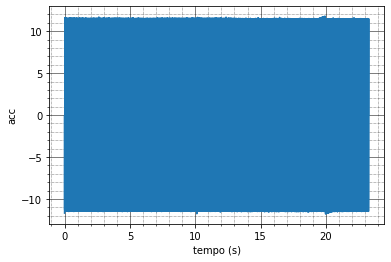

In [20]:
plt.plot(t1,accz)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

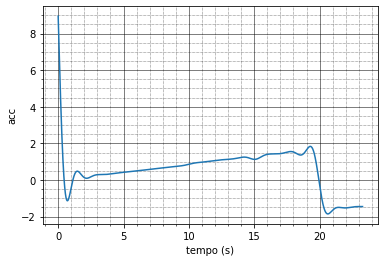

In [21]:
e, f = signal.butter(4, 0.007, analog=False)


sig_accx = signal.filtfilt(e, f, accx)

plt.plot(t1,sig_accx)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

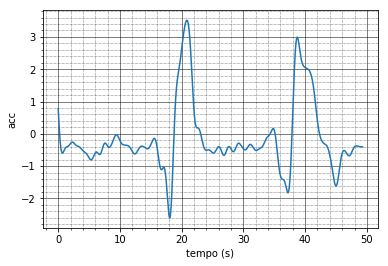

In [107]:
sig_accy = signal.filtfilt(e, f, accy)


plt.plot(t1,sig_accy)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

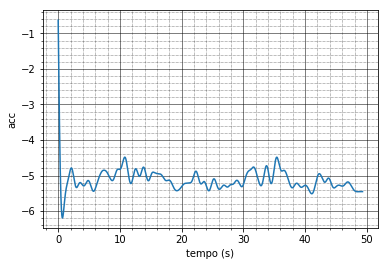

In [108]:
sig_accz = signal.filtfilt(e, f, accz)


plt.plot(t1,sig_accz)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

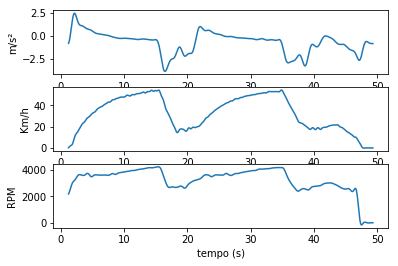

In [109]:
plt.figure()

plt.subplot(311)
plt.plot(t1[250:], -1*sig_accx[250:])
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')


plt.subplot(312)
plt.plot(t[25:], sig_vel[25:])
plt.xlabel('tempo (s)')
plt.ylabel('Km/h')


plt.subplot(313)
plt.plot(t[25:], sig_rot[25:])
plt.xlabel('tempo (s)')
plt.ylabel('RPM')

plt.savefig('Gráfico.png')

plt.show()

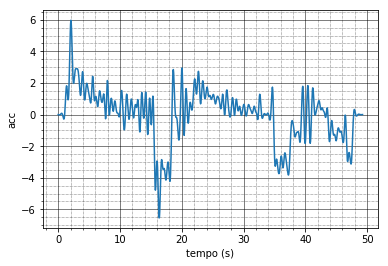

In [110]:
t2 = np.linspace(1, len(sig_vel), len(sig_vel))
t2 = [int(k) for k in t2]

accxn = [-1*(sig_vel[k-1]-sig_vel[k])/(0.05*3.66) for k in t2[:-1]]


plt.plot(t[:-1],accxn)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

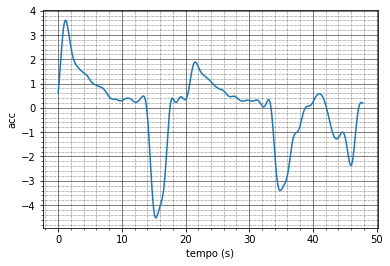

In [111]:
g, h = signal.butter(4, 0.05, analog=False)

sig_accxn = signal.filtfilt(g, h, accxn)


plt.plot(t[:-30],sig_accxn[22:-7])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

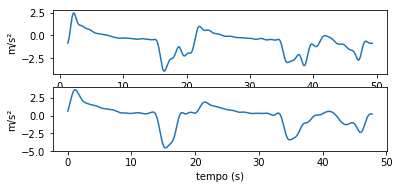

In [112]:
plt.figure()

plt.subplot(311)
plt.plot(t1[250:], -1*sig_accx[250:])
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')


plt.subplot(312)
plt.plot(t[:-30],sig_accxn[22:-7])
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')

plt.savefig('aceleração X.png')

plt.show()

In [113]:
print(max(sig_accx, key=int))
print(max(sig_accxn, key=int))

sig_accz = [k + 5 for k in sig_accz]

print(max(sig_vel, key=int))



3.878038452322183
3.079118301847369
54.05668366883468


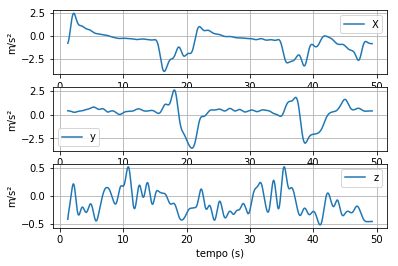

In [114]:
plt.figure()

plt.subplot(311)
plt.plot(t1[250:], -1*sig_accx[250:], label='X')
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')
plt.grid(True, which='both')
plt.legend(loc="best")


plt.subplot(312)
plt.plot(t1[250:], -1*sig_accy[250:], label='y')
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')
plt.grid(True, which='both')
plt.legend(loc="best")


plt.subplot(313)
plt.plot(t1[250:], sig_accz[250:], label='z')
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')
plt.grid(True, which='both')
plt.legend(loc="best")

plt.savefig('aceleração.jpeg')

plt.show()

In [115]:
t_motor = [j * 20 for j in rot_bruto]
t_roda = [i * 20/15 for i in vel_bruto]

sig_t_motor = signal.filtfilt(c, d, t_motor)
sig_t_roda = signal.filtfilt(c, d, t_roda)


relacao = [sig_t_motor[i-1]/sig_t_roda[i-1] for i in t2]

sig_relacao = signal.filtfilt(c, d, relacao)


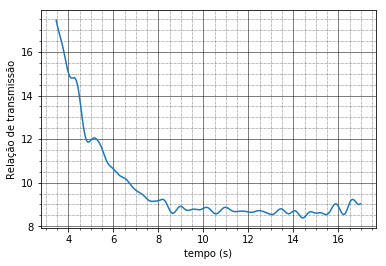

In [116]:
plt.plot(t[69:340],relacao[69:340])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('Relação de transmissão')

plt.savefig('Relação de transmissão.jpeg')

plt.show()

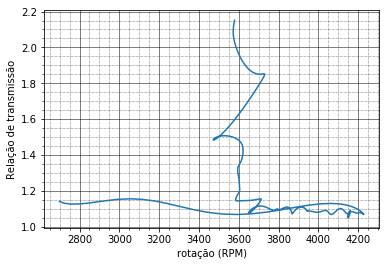

In [117]:
relacaocvt = [relacao[i]/8 for i in t2[:-1]]

plt.plot(sig_rot[69:340],relacaocvt[69:340])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('rotação (RPM)')
plt.ylabel('Relação de transmissão')

plt.savefig('Relação de transmissão com retas 27do11 peso 50 mola preta rampa gaged pre-carga 10mm')

plt.show()

best fit line:
y = 0.00 + 290.30x


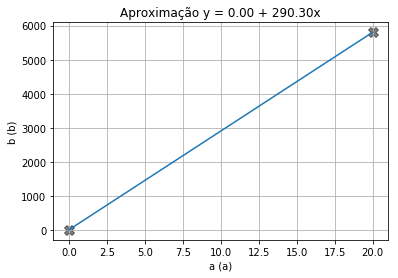

In [118]:

X = [0, 20]
Y = [0, 5806]


def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:


# plot points and fit line  
plt.scatter(X, Y, 100, c="black", alpha=0.5, marker="X")
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
plt.grid(True)
plt.xlabel("a (a)")
plt.ylabel("b (b)")
plt.title('Aproximação y = {:.2f} + {:.2f}x'.format(a, b))
plt.show()




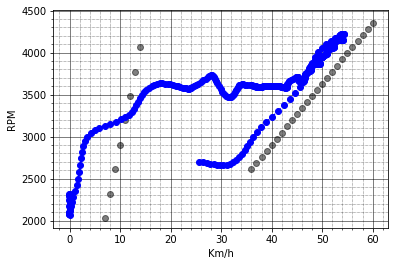

In [119]:
m = np.linspace(1, 100, 100)
reta = [m[i]*290.3 for i,k in enumerate(m)]
reta2 = [m[i]*290.3/4 for i,k in enumerate(m)]

plt.scatter(m[6:-86], reta[6:-86], c="black", alpha=0.5)
plt.scatter(m[35:-40], reta2[35:-40], c="black", alpha=0.5)
plt.plot(sig_vel[5:350], sig_rot[5:350], marker='o', linestyle='--', color='b') 
plt.xlabel('Km/h')
plt.ylabel('RPM')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('Vel x Rot com retas.jpeg')

plt.show()

In [120]:
s = [sum(sig_vel[:k])*0.05/(3.66) for k in t2[:-1]]
RPM = [x for x in sig_rot]
index30 = s.index(30.051547889583183)
index0 = s.index(0.3640648617505487)
index3500 = RPM.index( 3565.2005304671175)
print(sig_vel[index30],sig_rot[index30], t[index30] - t[index0], t[index3500] - t[index0])

ValueError: 30.051547889583183 is not in list

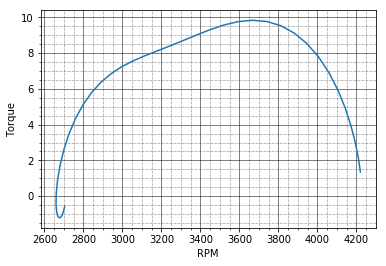

984 984


In [135]:
x, z = signal.butter(4, 0.1, analog=False)


sig_rotT = signal.filtfilt(x, z, rot)
sig_rotT = [x for x in sig_rotT]

torque = [(sig_rotT[k-1]-sig_rotT[k])/7.6 for k in t2[:-1]]
del sig_rotT[-1]


plt.plot(sig_rotT[310:350],torque[310:350])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('RPM')
plt.ylabel('Torque')
plt.savefig('Torque.jpeg')

plt.show()

print(len(sig_rotT), len(torque))